## Pizza Place Sales Analysis

Welcome to the Pizza Place Sales Exploration.

We will analyze the **sales, orders, pizza types and trends** to uncover business insights. 

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings ("ignore")


#---

### Step 1: Import the CSV files **

 We have 4 datasets:

 1. orders_df.csv: contains order_id, date, time.

 2. orderdetails_df.csv: contains order_id, pizza_id, quantity

 3. pizzas_df.csv: contains pizza_id, pizza_type_id, size, price

 4. pizzatypes_df.csv: contains pizza_type_id, name, category, ingredients

#---

 Each relates by key columns (like order_id, pizza_id, pizzatype_id).

#### Step 2: Load and Combine All Datasets
We will begin by importing the four CSV files and joining them into a single data set 'final_df'.

This will enable us to analyze orders, pizza details, and sales information together seamlessly. 

In [2]:
order_df = pd.read_csv (r"C:\Users\Administrator\Downloads\pizza_sales\orders.csv")

order_df

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [3]:
orderdetails_df=pd.read_csv (r"C:\Users\Administrator\Downloads\pizza_sales\order_details.csv")

orderdetails_df

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [4]:
pizzas_df = pd.read_csv (r"C:\Users\Administrator\Downloads\pizza_sales\pizzas.csv")

pizzas_df

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [5]:
pizzastype_df =pd.read_csv (r"C:\Users\Administrator\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding = "latin1")

pizzastype_df

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


#### Step 3: Merge step by step

 We will combine all the CSVs step by step:
 * merge_df1 = pd.merge (order_df, orderdetails_df, on ='order_id', how = 'left' ) 
 * merged_df2 = pd.merge (pizzas_df, pizzastype_df, on ='pizza_type_id', how = 'left')
 * final_df = pd.merge (merged_df1, merged_df2, on = 'pizza_id', how= 'left')
 

#### Merge_df1 (order_df and orderdetails_df on order_id)

In [6]:
merged_df1= pd.merge (order_df,orderdetails_df, on ='order_id', how = 'left')

merged_df1

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1
...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1


#### Merge_df2 (pizzas_df and pizzastype_df on pizzas_type_id)

In [7]:
merged_df2 = pd.merge (pizzas_df, pizzastype_df, on ='pizza_type_id', how = 'left') 

merged_df2

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


#### final_df (Merge merged_df1 and merged_df2 on pizza_id)

In [8]:
final_df = pd.merge (merged_df1, merged_df2, on = 'pizza_id', how= 'left')

final_df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [9]:
# To Check for rows and columns

final_df.shape

(48620, 12)

In [10]:
# To check for the first five rows

final_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [11]:
# To Check for Statistical Summary of Numerical Columns

final_df.describe()

,order_id,order_details_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132
std,6180.119770,14035.529381,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,5337.000000,12155.750000,1.000000,12.750000
50%,10682.500000,24310.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000


In [12]:
# To Check for Null values

final_df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [13]:
# To Check the Overview of the Data type

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [14]:
# To convert date to a datetime

final_df ["date"] = pd.to_datetime(final_df["date"])

final_df ["date"]

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: date, Length: 48620, dtype: datetime64[ns]

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [17]:
#To convert time to a datetime

final_df ["time"] = pd.to_datetime(final_df["time"])

final_df ["time"]


0       2025-09-29 11:38:36
1       2025-09-29 11:57:40
2       2025-09-29 11:57:40
3       2025-09-29 11:57:40
4       2025-09-29 11:57:40
                ...        
48615   2025-09-29 21:23:10
48616   2025-09-29 21:23:10
48617   2025-09-29 21:23:10
48618   2025-09-29 22:09:54
48619   2025-09-29 23:02:05
Name: time, Length: 48620, dtype: datetime64[ns]

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  datetime64[ns]
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [19]:
final_df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,2025-09-29 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,2025-09-29 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,2025-09-29 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,2025-09-29 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,2025-09-29 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,2025-09-29 21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,2025-09-29 21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,2025-09-29 21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,2025-09-29 22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


####  1. Total Revenue / Sales
To Calculate the Total Revenue
Revenue = Price * Quantity.

Here, we will multiply each pizza's unit price by the quantity sold and sum it all up to find **the total sales made in  the year**


In [20]:
# Step 1: Create a Revenue column

final_df['Revenue'] = final_df ['quantity'] * final_df ['price']

final_df['Revenue']

0        13.25
1        16.00
2        18.50
3        20.75
4        16.00
         ...  
48615    16.75
48616    17.95
48617    12.00
48618    20.25
48619    12.75
Name: Revenue, Length: 48620, dtype: float64

In [21]:
# Step 2: Calculate Total Revenue

total_revenue = final_df['Revenue'].sum()

print ("Total Revenue:", total_revenue)

Total Revenue: 817860.05


#### 2. Total Quantity Sold

Next we will count **all pizzas sold** across the year.

This gives us a sense of how busy the restaurant was and the scale of customer demand. 

In [22]:
total_quantity = final_df ['quantity'].sum()

total_quantity

print ("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 49574


**Insight**:
* Thousands of pizzas were sold 🍕,a clear sign of high customer demand throughout the year.


#### 3. Total Orders

Each unique 'order_id' represents one completed customer order.

We will count how many orders were placed during the year

In [23]:
# To find total number of unique values using .nunique() method

total_orders = final_df ['order_id'].nunique()

print ("Total Orders:", total_orders)

Total Orders: 21350


In [24]:
# Or To Count all rows

total_orders = len (final_df)

print ("Total Orders:", total_orders)

Total Orders: 48620


**Insight**:
* The number of unique orders shows how many transactions happened.

* It highlights customer activity and repeat purchases.


#### 4. Number of Pizza Types

From the 'pizza_types' dataset, we will check how many **unique pizza types** the restaurant offers.

This tells us how diverse their menu is

In [26]:
# Number of Unique Pizza Types using (.nunique() method) which returns the number of unique values(an integer)

pizza_types_count = final_df ['pizza_type_id'] .nunique()

print ("Total Pizza Types Sold:",pizza_types_count)

Total Pizza Types Sold: 32


In [28]:
# List of all Pizza Types using the .unique() method which returns array of the distinct values in a column

pizza_types = final_df ['pizza_type_id'] .unique()

print ("Pizza Types:", pizza_types)

Pizza Types: ['hawaiian' 'classic_dlx' 'five_cheese' 'ital_supr' 'mexicana' 'thai_ckn'
 'prsc_argla' 'bbq_ckn' 'the_greek' 'spinach_supr' 'green_garden'
 'ital_cpcllo' 'spicy_ital' 'spin_pesto' 'veggie_veg' 'southw_ckn'
 'cali_ckn' 'pepperoni' 'ckn_pesto' 'big_meat' 'soppressata' 'four_cheese'
 'napolitana' 'calabrese' 'ital_veggie' 'mediterraneo' 'peppr_salami'
 'spinach_fet' 'sicilian' 'ckn_alfredo' 'pep_msh_pep' 'brie_carre']


In [31]:
 # To Count how many Orders per Pizza Type

orders_per_pizza = final_df ['pizza_type_id'].value_counts()

print (orders_per_pizza)

pizza_type_id
classic_dlx     2416
bbq_ckn         2372
hawaiian        2370
pepperoni       2369
thai_ckn        2315
cali_ckn        2302
spicy_ital      1887
sicilian        1887
southw_ckn      1885
four_cheese     1850
ital_supr       1849
big_meat        1811
veggie_veg      1510
mexicana        1456
napolitana      1451
spinach_fet     1432
prsc_argla      1428
peppr_salami    1422
ital_cpcllo     1414
the_greek       1406
five_cheese     1359
pep_msh_pep     1342
green_garden     987
ckn_alfredo      980
ital_veggie      975
ckn_pesto        961
soppressata      957
spin_pesto       957
spinach_supr     940
calabrese        927
mediterraneo     923
brie_carre       480
Name: count, dtype: int64


**Insight**:
* The restaurant offers a wide variety of pizza types. 

* This variety caters to different tastes and preferences, attracting a larger customer base

#### 5. Average Price of Pizzas

We will calculate the mean of all pizza prices.

This gives us insight into the restaurant's general pricing strategy.

In [32]:
average_price = final_df['price'].mean()

print ("Average Price:",round (average_price, 2))

Average Price: 16.49


**Insight**:
* The average price tells us whether this pizza shop positions itself as a budget-friendly or premium option in the market

#### 6. Peak Hours of Sales

By analizing the **time of orders**, we will find out during which hours customer orders the most pizzas.

This can guide Staffing decisions and marketing strategies. 

Peak Hours of Sales: hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: Revenue, dtype: float64


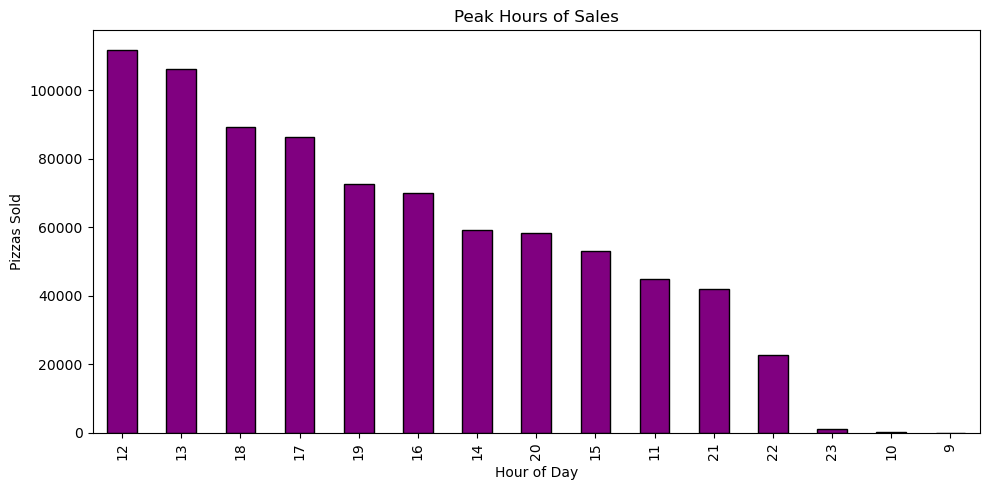

In [33]:
# Extract the hour since time column have been converted to datetime

final_df['hour'] = final_df['time'].dt.hour

# Group by hour and sum revenue 
peak_hours = final_df.groupby ('hour')['Revenue'].sum().sort_values (ascending = False)

print ("Peak Hours of Sales:",peak_hours)

# Visual Representation of Peak Hours of Sales.
plt.figure (figsize = (10, 5))
peak_hours.plot (kind = "bar", color = "purple", edgecolor = "black")
plt.title ("Peak Hours of Sales")
plt.xlabel ("Hour of Day")
plt.ylabel ("Pizzas Sold")
plt.tight_layout()

plt.show()

**Insight**:
* Sales peak around meal times (especially evening hours, 6–9 PM).

* This aligns with customer dining habits—pizza is a popular dinner choice.


### 7. Sales by Day of the Week

#### 7a. Total Sales Per Day of the Week
We will check which day of the week brings in the most revenue.

This helps spot weekly sales patterns and the busiest days.

Days of the Week: day_of_week
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: Revenue, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

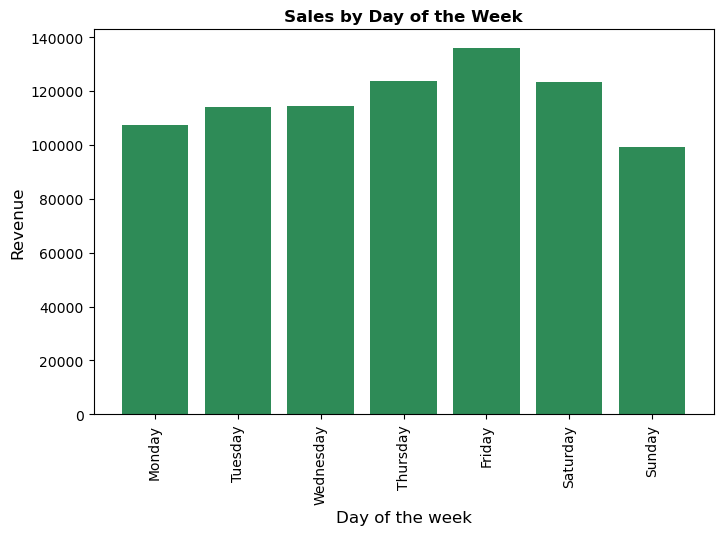

In [34]:
# Day of the Week is Extracted from the "date" column

final_df['day_of_week'] = final_df['date'].dt.day_name()

# Correct order for Days is Defined
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

final_df ['day_of_week'] = pd.Categorical (final_df['day_of_week'], categories =days_order, ordered = True)

# Day of the Week is grouped and the Revenue is summed
sales_by_day = final_df.groupby('day_of_week')['Revenue'].sum()

print ("Days of the Week:",sales_by_day)


# Visual Representation of Sales by Day of the Week
plt.figure (figsize = (8,5))
plt.bar (sales_by_day.index, sales_by_day.values, color ="seagreen")
plt.title("Sales by Day of the Week", fontsize=12, fontweight="bold")
plt.xlabel("Day of the week", fontsize =12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation =90)

plt.show

#### 7b. Days of the Week with Most Sales

To determine the days of the week with the most sales by using **.idmax**

In [35]:
best_day = sales_by_day.idxmax()

print ("Best Day of Sales:", best_day)

Best Day of Sales: Friday


**Insight**:
* The weekend (Friday & Saturday) brings the highest revenue.

* Customers likely order more pizzas for family gatherings, parties, or leisure time.

#### 8. Top 5 Bestselling Pizzas
We will rank pizzas based on the total sales quantity and revenue.

This highlights customers favourites and can inform promotional strategies.

Top 5 Pizzas: pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64


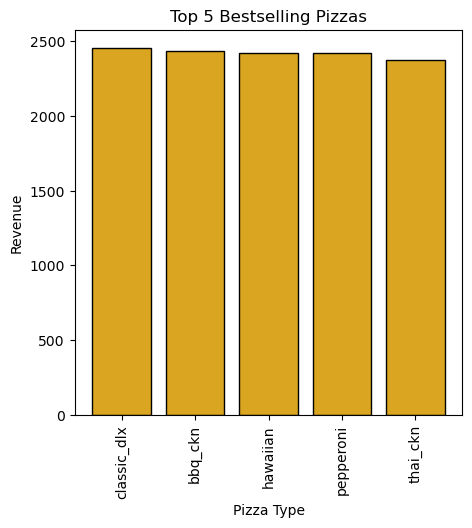

In [37]:
# Top 5 pizzas by revenue

top_5 = final_df.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending = False).head(5)

print ("Top 5 Pizzas:", top_5)

#Visual Representation of top 5 Selling Pizzas
plt.figure (figsize =(5,5))
plt.bar (top_5.index, top_5.values, color= "goldenrod", edgecolor = "black")
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Pizza Type")
plt.ylabel("Revenue")
plt.xticks(rotation=90)

plt.show()


**Insight**:
* The bestselling pizzas dominate revenue, showing clear customer favorites.

* These should be highlighted in promotions or combo deals to maximize profits.


#### 9. Sales Made in Each Month
By grouping sales by month, we get to know how revenue changes over time.

This can reveal *seasonal trends* like whether sales spike during holidays or weekends.

month
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
February     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: Revenue, dtype: float64


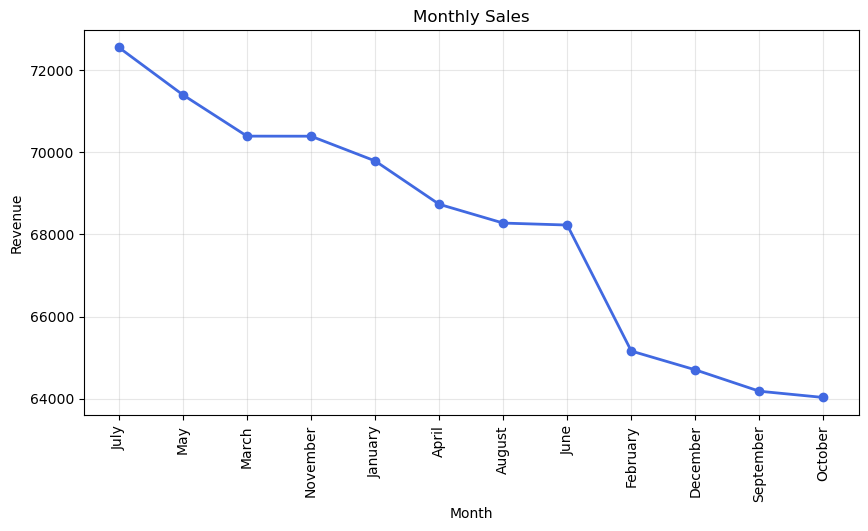

In [38]:
#Extract Month
final_df ['month'] = final_df ['date'].dt.month_name()

monthly_sales = final_df.groupby ('month')['Revenue'].sum().sort_values(ascending = False)

print (monthly_sales)

#Visual Representation of Monthly Sales
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", color= "royalblue", linewidth=2)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.grid (alpha =0.3)

plt.show()

**Insight**:
* Sales show seasonal trends 📈. Some months peak (possibly holidays/events), while others dip.

* The restaurant can plan promotions during slow months and prepare stock for peak seasons.


#### 10. Pizzas Not Doing Well
Not every pizza on the menu performs well.

We will spot pizzas with **low sales quantities or revenues**, which could be considered for removal or promotion

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
spin_pesto      970
ckn_pesto       973
ital_veggie     981
ckn_alfredo     987
green_garden    997
Name: quantity, dtype: int64


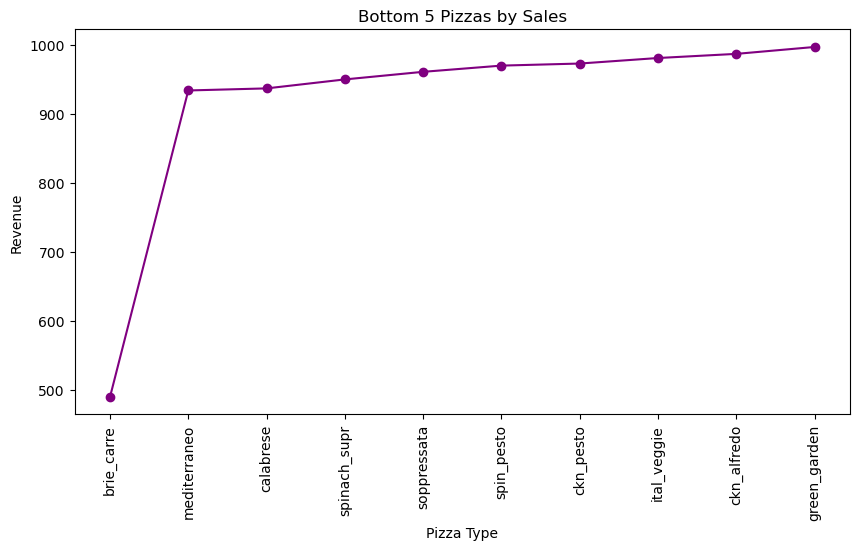

In [39]:
#Bottom 5 Pizzas by Revenue

low_selling = final_df.groupby ('pizza_type_id')['quantity'].sum().sort_values().head(10)
print (low_selling)

# Visual Representation of Pizzas not Doing Well
plt.figure(figsize=(10,5))
plt.plot(low_selling.index, low_selling.values, marker="o", color= "purple")
plt.title("Bottom 5 Pizzas by Sales")
plt.xlabel("Pizza Type")
plt.ylabel("Revenue")
plt.xticks(rotation=90)


plt.show()

**Insight**:
These pizzas contribute very little to revenue.

The restaurant may consider removing them from the menu or revamping marketing strategies to boost sales.


**More Explorations on the dataset**
#### Heat Map: Revenue by day vs hour

This Heatmap provides a ***detailed operational view***of when sales happen most often.

* This helps to identify **peak hours** to schedule more staff and prepare enough ingredients'
* Reveals **slow hours** that is useful for promotions or delivery discounts'
* Shows which **days of the week that consistently outperform others**

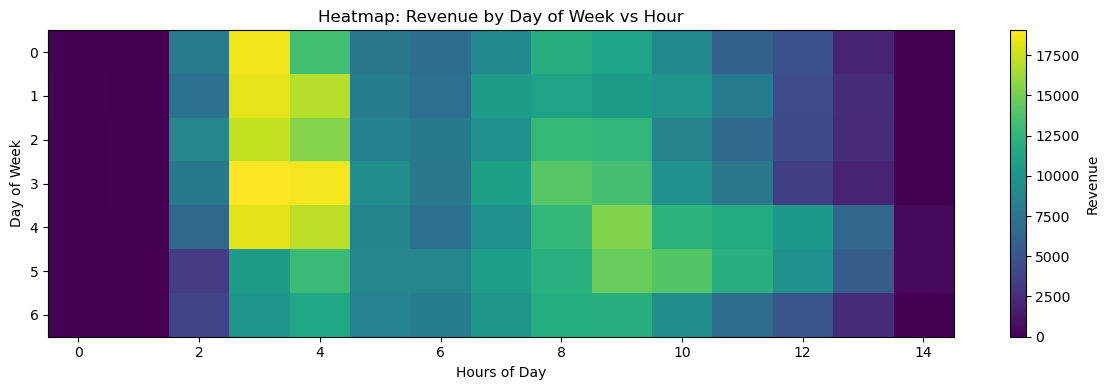

In [43]:
# First Create a pivot table for revenue by day vs hours
pivot = final_df.pivot_table(
    values = "Revenue",
    index="day_of_week",
    columns="hour",
    aggfunc="sum",
    fill_value=0).reindex (days_order)

# Plot heatmap with Matplotlib
plt.figure(figsize=(12, 4))
plt.imshow(pivot, aspect = "auto", cmap = "v")

# Add colorbar
plt.colorbar(label="Revenue")
plt.xticks(rotation =0)

# Labels and title
plt.title("Heatmap: Revenue by Day of Week vs Hour")
plt.xlabel("Hours of Day")
plt.ylabel("Day of Week")

plt.tight_layout()
plt.show()

**Insight**:
* The heatmap shows peak activity in the evenings, especially around Friday & Saturday nights.

* Midday peaks (lunch hours) also appear but are smaller compared to dinner hours.


### ✨ Final Note:
This report tells the story of the pizza place:
* Strong **dinner and weekend sales**
* Clear **top-performing pizzas**
* Seasonal **demand patterns**
* Some pizzas need **attention or removal**

### **✅Recommendation**:
* Schedule more staff during weekend evenings (e.g., Friday 6–10 PM, Saturday dinner time).

* Use lunchtime promotions to boost mid-day sales.

* Stock up on popular pizzas before peak times to avoid shortages.